# IMPORTS DE LIBRAIRIES

In [1]:
import torch 
print("torch version           : ", torch.__version__)
print("torch cuda version      : ", torch.version.cuda)
print("torch.cuda.is_available : ", torch.cuda.is_available())

torch version           :  2.5.1
torch cuda version      :  11.8
torch.cuda.is_available :  True


In [2]:
import detectron2
print("detectron2 version : ", detectron2.__version__)

detectron2 version :  0.1.3


In [3]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import ColorMode
from detectron2.data.datasets import get_dicts

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os, json, cv2, random, glob


In [5]:
def imBGRshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [6]:
def imRGBshow(img):
    plt.imshow(img)
    plt.show()

# REGISTER LES IMAGES
## /!\ CHANGE THE DATA PATH ACCORDINGLY

NB : Les classes sont les suivantes :
- 0 : Cellule intacte et nette   (Intact_Sharp)
- 1 : Cellule intacte et floue   (Intact_Blurry)
- 2 : Cellule explosée et nette  (Broken_Sharp)
- 3 : Cellule explosée et floue  (Broken_Blurry)

Pour considérer tous les types de cellules, utiliser :
classes = {'Intact_Sharp':0,'Intact_Blurry':1,'Broken_Sharp':2,'Broken_Blurry':3}

Pour seulement considérer les cellules nettes, utiliser :
classes = {'Intact_Sharp':0, 'Broken_Sharp':2}

In [7]:
classes = {'Intact_Sharp':0, 'Broken_Sharp':2}
#classes = {'Intact_Sharp':0,'Intact_Blurry':1,'Broken_Sharp':2,'Broken_Blurry':3}
data_path = '/projects/INSA-Image/B01/Data/'
cross_val_idx = 0

In [8]:
# Register the train dataset
DatasetCatalog.register('train', lambda: get_dicts(data_path, 'train', cross_val_idx, classes))

# RECUPERE LES IMAGES ET LES DICTIONNAIRES POUR AFFICHAGE

In [9]:
train_metadata = MetadataCatalog.get("train")
train_dataset_dicts = DatasetCatalog.get("train")

cross validation 2, mode train: 15015it [00:09, 1607.03it/s]
cross validation 3, mode train: 15015it [00:10, 1415.32it/s]
cross validation 4, mode train: 14875it [00:11, 1343.84it/s]


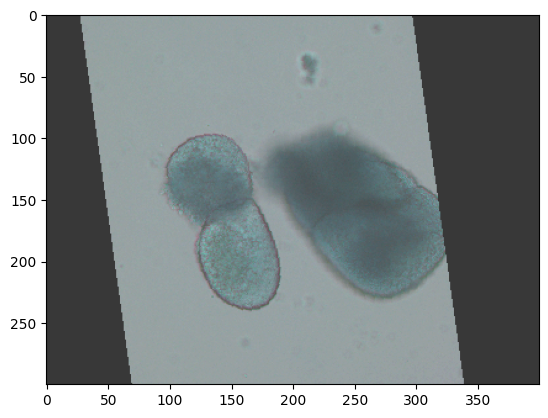

/projects/INSA-Image/B01/Data/Cross-val/Xval4/images/Augmented4T5P15F2.png


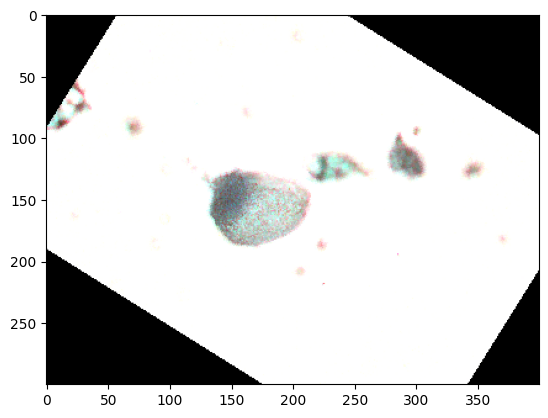

/projects/INSA-Image/B01/Data/Cross-val/Xval4/images/Augmented15T4P11F6.png


In [12]:
# Visualize 2 random samples
for data in random.sample(train_dataset_dicts, 2):
    img = cv2.imread(data["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=1)
    out = visualizer.draw_dataset_dict(data)
    imRGBshow(out.get_image())
    print(data["file_name"])